# Lec 1

In [1]:

import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
sns.set_theme('notebook', 'whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("data/buenos_aires1.csv", encoding = "cp1252")
data

,type,country,region,lat,lon,price_usd,area_m2,floor,rooms,expenses,property_url
0,apartment,Argentina,Capital Federal,-34.604783,-58.458681,180000.0,110.0,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.649700,-58.658073,410000.0,220.0,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
2,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.595709,-58.566950,180000.0,135.0,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
3,apartment,Argentina,Capital Federal,-34.584651,-58.454693,129000.0,70.0,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
4,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.655209,-58.697320,130000.0,140.0,NaN,NaN,NaN,http://ituzaingo-bs-as-g-b-a-zona-oeste.proper...
...,...,...,...,...,...,...,...,...,...,...,...
4827,apartment,Argentina,Bs.As. G.B.A. Zona Oeste,-34.601062,-58.566101,54000.0,31.0,10.0,2.0,NaN,http://caseros.properati.com.ar/vbya_venta_dep...
4828,apartment,Argentina,Bs.As. G.B.A. Zona Norte,-34.492839,-58.495680,85000.0,27.0,6.0,NaN,NaN,http://martinez.properati.com.ar/11cqc_venta_d...
4829,house,Argentina,Bs.As. G.B.A. Zona Norte,-34.356741,-58.796701,1600000.0,600.0,NaN,NaN,NaN,http://bs-as-g-b-a-zona-norte.properati.com.ar...
4830,house,Argentina,Capital Federal,-34.612354,-58.387462,190000.0,115.0,NaN,NaN,NaN,http://san-nicolas.properati.com.ar/zzpa_venta...


## EDA & Wrangling

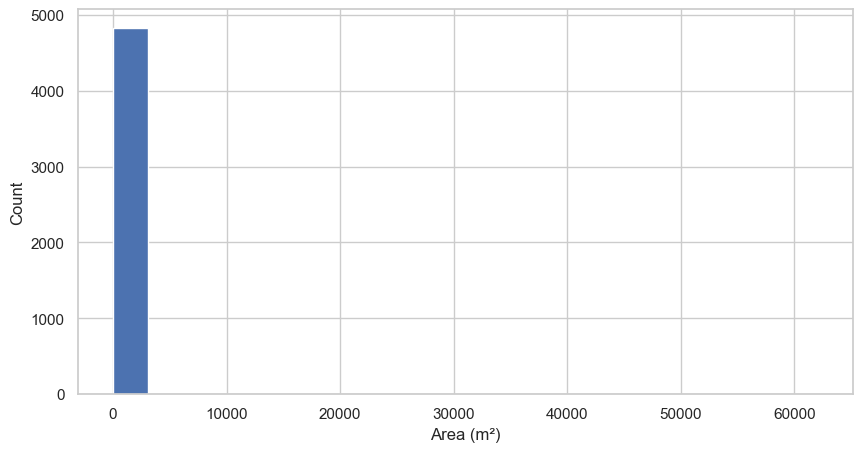

In [3]:
data.area_m2.plot(kind="hist",
                  xlabel="Area (m²)", 
                  ylabel="Count", 
                  bins=20, 
                  figsize=(10, 5));

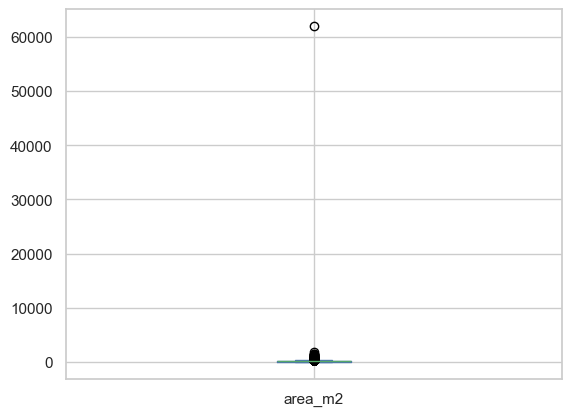

In [4]:
data.area_m2.plot(kind="box");

In [5]:
lo,high =data.area_m2.quantile([0.1,0.9])
data = data[data.area_m2.between(lo,high)]

high = data.price_usd.quantile(0.97)
data = data [data.price_usd.between(0,high)]


data = data[['type', 'country', 'region', 'lat', 'lon', 'area_m2', 'price_usd']]
df = data.reset_index(drop=True)
df.region = df.region.str.replace('Bs.As. G.B.A. ','')

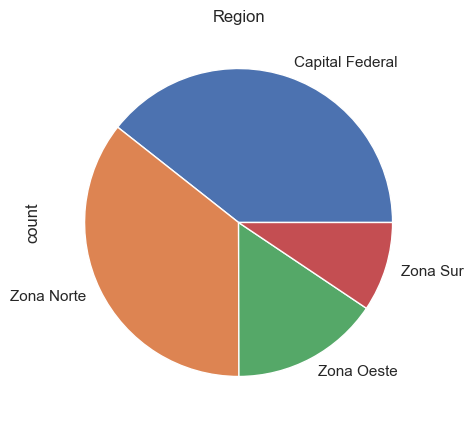

In [6]:
df.region.value_counts().plot(kind="pie",  
               title="Region",
               figsize=(10, 5));

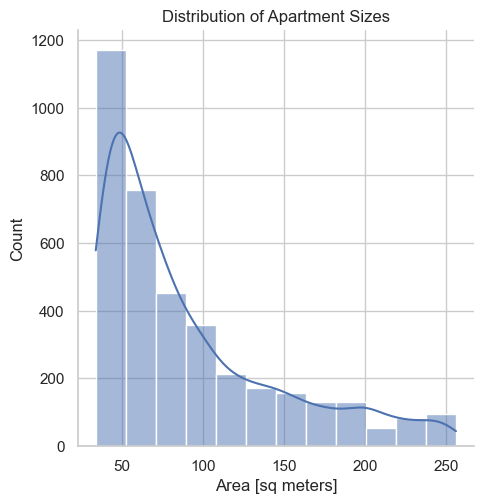

In [7]:
sns.displot(data = df,
           x = 'area_m2',
           kde = True,
           bins = 12)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

<Axes: >

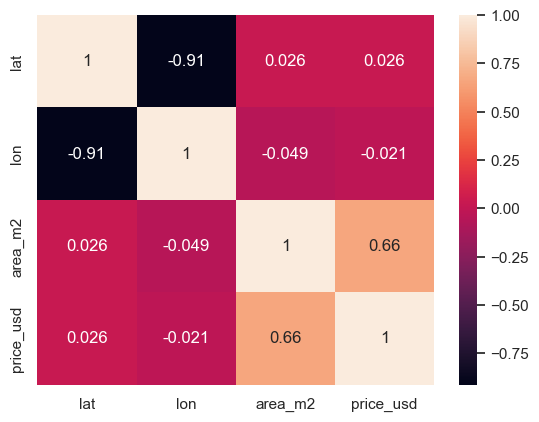

In [8]:
sns.heatmap(df.iloc[:,3:].corr(), annot=True)

## Sampling: Stratified

In [9]:
# Stratified sampling
df.groupby('region').sample(frac=1)

,type,country,region,lat,lon,area_m2,price_usd
2025,apartment,Argentina,Capital Federal,-34.554374,-58.463230,60.0,145000.0
1029,apartment,Argentina,Capital Federal,-34.557199,-58.480847,61.0,176000.0
3771,apartment,Argentina,Capital Federal,-34.624002,-58.390588,43.0,62000.0
3397,apartment,Argentina,Capital Federal,-34.612986,-58.432871,59.0,149000.0
321,apartment,Argentina,Capital Federal,-34.558361,-58.448108,35.0,79000.0
...,...,...,...,...,...,...,...
2860,apartment,Argentina,Zona Sur,-34.902490,-57.958447,80.0,120000.0
1191,house,Argentina,Zona Sur,-34.681534,-58.381982,110.0,75000.0
3018,apartment,Argentina,Zona Sur,-34.925666,-57.976785,85.0,150000.0
375,apartment,Argentina,Zona Sur,-34.703950,-58.390758,45.0,95000.0


In [10]:
# Calculate the number of datapoints to be sampled in each strata
n = df['region'].value_counts().min()

# Sample each strata
sample = df.groupby('region', 
                        group_keys=False).apply(lambda 
                                                x: x.sample(n))

sample = sample.reset_index(drop=True)
sample.index += 1

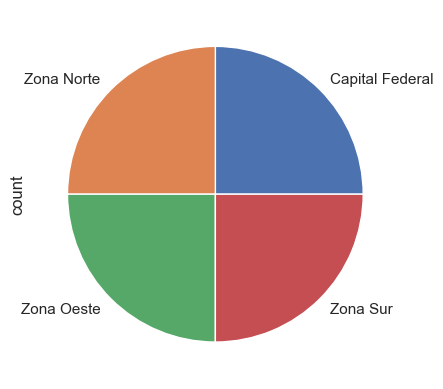

In [11]:
sample.region.value_counts().plot(kind="pie");

In [12]:
sample

,type,country,region,lat,lon,area_m2,price_usd
1,apartment,Argentina,Capital Federal,-34.593878,-58.429594,40.0,143000.0
2,apartment,Argentina,Capital Federal,-34.607170,-58.396378,118.0,170000.0
3,apartment,Argentina,Capital Federal,-34.541790,-58.476815,71.0,191134.0
4,apartment,Argentina,Capital Federal,-34.615939,-58.458542,45.0,125000.0
5,apartment,Argentina,Capital Federal,-34.615310,-58.361983,54.0,205095.0
...,...,...,...,...,...,...,...
1416,apartment,Argentina,Zona Sur,-34.670047,-58.354933,51.0,96500.0
1417,apartment,Argentina,Zona Sur,-34.759216,-58.227749,115.0,271330.0
1418,house,Argentina,Zona Sur,-34.803426,-58.383815,168.0,194000.0
1419,house,Argentina,Zona Sur,-34.704786,-58.388499,200.0,340000.0


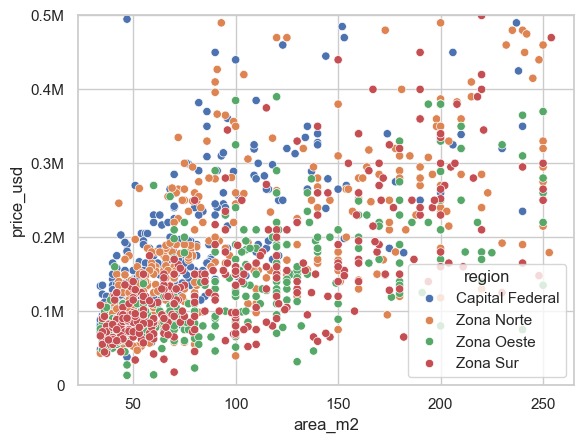

In [20]:
fig, ax = plt.subplots()

sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax);
ax.set_ylim(0,500000);
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

plt.yticks([0,100000,200000,300000,400000,500000]);

## Modelling

In [14]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(sample['area_m2'],
                                             sample['price_usd'],
                                             test_size=0.2,
                                             random_state=69)

In [29]:
xTrain = pd.DataFrame(xTrain).rename({0:'area_m2'},axis=1)

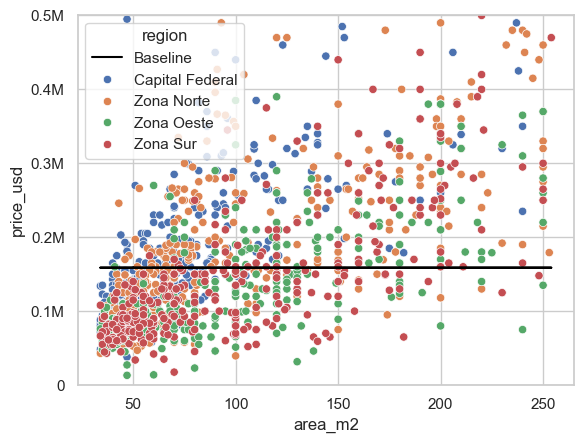

In [30]:
modelBs = np.full_like(yTrain, np.mean(yTrain))


fig, ax = plt.subplots()
plt.plot(xTrain.squeeze(),modelBs,color='black',label='Baseline')
sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax)
ax.set_ylim(0,500000)
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

In [36]:
error = mean_absolute_error(yTrain,modelBs)
f'error - {round(error,2)}'

'error - 72232.3'

In [31]:
model = LinearRegression()

In [32]:
model.fit(xTrain,yTrain)

LinearRegression()

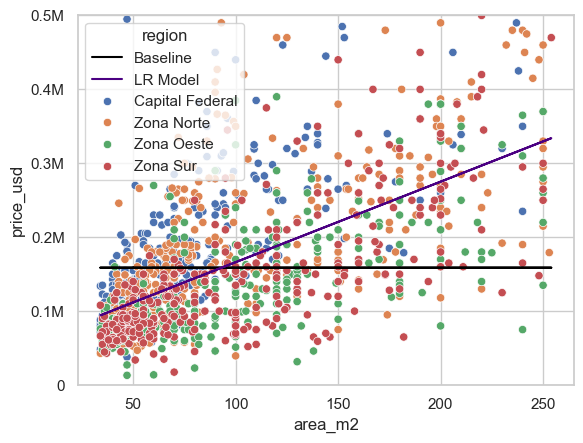

In [38]:

fig, ax = plt.subplots()
plt.plot(xTrain.squeeze(),modelBs,color='black',label='Baseline')
plt.plot(xTrain.squeeze(),model.predict(xTrain),color='indigo',label='LR Model')
sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax)
ax.set_ylim(0,500000)
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);